# An ensemble strategy using public LBs

1) X축은 평균상관관계, Y축은 Public LB Score로 하여 각 submission을 plot한 후  
2) 가장 성능이 우수한 submission(산의 정상)으로부터 능선을 따라 가면서 적절하게 앙상블할 submission을 고르는 방법

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import os

In [2]:
# 이 코드를 실행하기 전에 
# 1) 아래 폴더에 분석하려는 모든 submission화일을 저장해야 함 !!!
# 2) 화일명은 XXX_logloss.csv 형태(예: DNN_1.49003)로 저장되어 있어야 함.
path = './submissions'

preds = []
losses = []
names = []
files = [file for file in os.listdir(path) if file.endswith(".csv")]
for f in files:
    try:    
        preds.append(pd.read_csv(path + '/' + f).F20)
        losses.append(float(f[f.index('.')-1:-4])*-1)
        names.append(f[:f.find('.csv')])
    except:
        print(f'Read error: {f}')
        continue
        
corr = pd.DataFrame(preds).T.corr().mean(axis=0).values
df = pd.DataFrame({'model': names, 'logloss': losses, 'cor': corr})        

In [3]:
df

,model,logloss,cor
0,1st_rnd_1st_1.46108,-1.46108,0.969690
1,1st_rnd_2nd_1.47846,-1.47846,0.960965
2,1st_rnd_3rd_1.48811,-1.48811,0.954634
3,ktrain_mlp_1.46573,-1.46573,0.954018


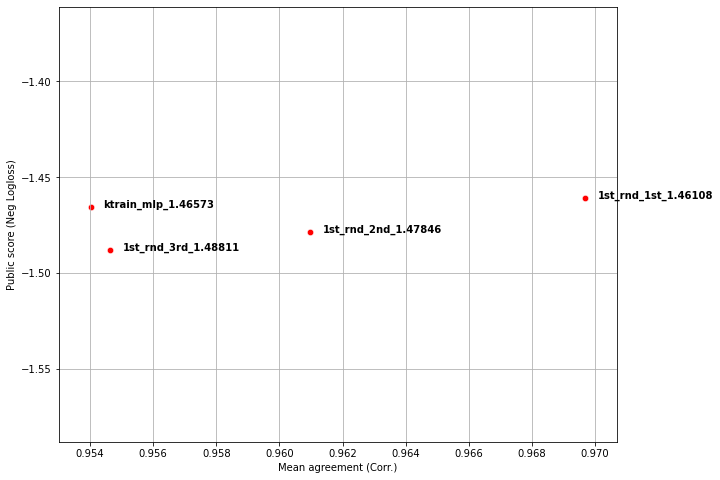

In [4]:
plt.figure(figsize=(10,8))
g = sns.scatterplot(x="cor", y="logloss", data=df, s=40, color='red')

for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.0004, df.logloss[line]-0.00015, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.001,df.cor.max()+0.001))
plt.ylim((df.logloss.min()-0.1,df.logloss.max()+0.1))
plt.xlabel('Mean agreement (Corr.)')
plt.ylabel('Public score (Neg Logloss)')

plt.grid()
plt.show()

## End